# The occupation of economists on DBpedia

In [1]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pprint
import sparql_dataframe
import csv
# from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import pandas as pd
from collections import Counter
from operator import itemgetter


In [10]:
query = """
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT DISTINCT ?economist ?name (year(xsd:dateTime(?Birth_Date)) AS ?year) ?occupation

WHERE
     {
        {?economist ?propriety dbr:Economist .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist owl:sameAs ?sameAs .
        ?economist dbo:abstract ?abstract .
        ?economist dbp:occupation ?occupation1 .
        
  BIND(STRAFTER(STR(?occupation1),"http://dbpedia.org/resource/") AS ?occupation2)
  BIND(REPLACE(STR(?occupation2),"[_]"," ") AS ?occupation)

        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
        FILTER (CONTAINS(?name, " "))
        }
     UNION
        {
         ?economist a dbo:Economist .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist owl:sameAs ?sameAs .
        ?economist dbp:occupation ?occupation1 .
        
  BIND(STRAFTER(STR(?occupation1),"http://dbpedia.org/resource/") AS ?occupation2)
  BIND(REPLACE(STR(?occupation2),"[_]"," ") AS ?occupation)
        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
        }
        UNION
       {
        ?economist a dbo:Professor .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist owl:sameAs ?sameAs .
        ?economist dbo:abstract ?abstract .
        ?economist dbp:occupation ?occupation1 .
        
  BIND(STRAFTER(STR(?occupation1),"http://dbpedia.org/resource/") AS ?occupation2)
  BIND(REPLACE(STR(?occupation2),"[_]"," ") AS ?field)
        FILTER (CONTAINS(?abstract, "Economist") || CONTAINS(?abstract, "economist") || CONTAINS(?abstract, "économiste")  || CONTAINS(?abstract, "Économiste"))
        FILTER (CONTAINS(?name, " "))
        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
       }
       UNION
       {
        ?economist a dbo:Person .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist owl:sameAs ?sameAs .
        ?economist dbo:abstract ?abstract .
               ?economist dbp:occupation ?occupation1 .
        
  BIND(STRAFTER(STR(?occupation1),"http://dbpedia.org/resource/") AS ?occupation2)
  BIND(REPLACE(STR(?occupation2),"[_]"," ") AS ?occupation)
        FILTER (CONTAINS(?name, " "))
        FILTER (CONTAINS(?abstract, "Economist") || CONTAINS(?abstract, "economist") || CONTAINS(?abstract, "économiste")  || CONTAINS(?abstract, "Économiste"))

        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
  }
     }
"""

In [11]:
sparql = SPARQLWrapper("https://dbpedia.org/sparql")

In [12]:
sparql.setQuery(query)
sparql.setReturnFormat(JSON)

In [13]:
rc = sparql.queryAndConvert()
type(rc)

dict

In [14]:
# Number of rows in the result
len(rc['results']['bindings'])

2029

In [15]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Lucrezia_Reichlin'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Lucrezia Reichlin'}, 'year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1954'}, 'occupation': {'type': 'literal', 'value': ''}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Luigi_Bodio'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Luigi Bodio'}, 'year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1840'}, 'occupation': {'type': 'literal', 'value': ''}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Luis_Carlos_Croissier'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Luis Carlos Croissier'}, 'year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1950'}, 'occupation': {'type': 'literal', 'value': 'Politician'}}
{'economist': {'type': 'uri'

In [20]:
# Extract the values from the first five rows
i = 0
for l in rc['results']['bindings']:
    if i < 30:
        try: 
            name = l['name']['value']
            print([l['economist']['value'],name,l['occupation']['value'], l['year']['value']])
        except :
            try: 
                name = l['prefLabel']['value']
                print([l['economist']['value'],name,l['occupation']['value'],l['year']['value']])
            except :
                print([l['economist']['value'],'',l['occupation']['value'], l['year']['value']])

        i += 1

['http://dbpedia.org/resource/Lucrezia_Reichlin', 'Lucrezia Reichlin', '', '1954']
['http://dbpedia.org/resource/Luigi_Bodio', 'Luigi Bodio', '', '1840']
['http://dbpedia.org/resource/Luis_Carlos_Croissier', 'Luis Carlos Croissier', 'Politician', '1950']
['http://dbpedia.org/resource/Luis_Carlos_Croissier', 'Luis Carlos Croissier', 'Business executive', '1950']
['http://dbpedia.org/resource/Luis_Carlos_Croissier', 'Luis Carlos Croissier', 'Civil service', '1950']
['http://dbpedia.org/resource/Luis_Carlos_Croissier', 'Luis Carlos Croissier', 'Economist', '1950']
['http://dbpedia.org/resource/Luis_Carranza', 'Luis Carranza Ugarte', 'Bank', '1966']
['http://dbpedia.org/resource/Luis_Carranza', 'Luis Carranza Ugarte', 'Economist', '1966']
['http://dbpedia.org/resource/Luis_Guillermo_Vélez', 'Luis Guillermo Vélez Trujillo', 'Politician', '1943']
['http://dbpedia.org/resource/Lyndhurst_Giblin', 'Lyndhurst Giblin', 'Statistician', '1872']
['http://dbpedia.org/resource/Lyndhurst_Giblin', 'Lynd

In [21]:
# Explore
occupationList = []
for l in rc['results']['bindings']:
    occupationList.append(l['occupation']['value'])

In [22]:
# Count the occupations
counterOccupationList = Counter(occupationList)
groupedOccupationList = sorted(list(zip(counterOccupationList.values(), counterOccupationList.keys())), reverse=True)
groupedOccupationList

[(1112, ''),
 (184, 'Economist'),
 (113, 'Politician'),
 (44, 'Civil service'),
 (41, 'Board of directors'),
 (34, 'Author'),
 (33, 'Professor'),
 (29, 'Nonprofit organization'),
 (26, 'Businessperson'),
 (19, 'Journalist'),
 (18, 'Research'),
 (18, 'Bank'),
 (17, 'Lobbying'),
 (14, 'Jurist'),
 (14, 'Diplomat'),
 (12, 'Trade association'),
 (12, 'Lawyer'),
 (12, 'Financial analyst'),
 (12, 'Financial adviser'),
 (9, 'Editing'),
 (8, 'Writer'),
 (8, 'Historian'),
 (8, 'Academic administration'),
 (7, 'Pundit'),
 (6, 'Teacher'),
 (6, 'Accountant'),
 (6, 'Academy'),
 (5, 'Novelist'),
 (5, 'Film director'),
 (5, 'Actor'),
 (5, 'Activism'),
 (4, 'Trade union'),
 (4, 'Screenwriter'),
 (4, 'Scientist'),
 (4, 'Management consulting'),
 (4, 'Columnist'),
 (4, 'Anthropologist'),
 (3, 'Tax collector'),
 (3, 'Poet'),
 (3, 'Philosopher'),
 (3, 'Mathematician'),
 (3, 'Entrepreneurship'),
 (3, 'Consultant'),
 (3, 'Agricultural economics'),
 (2, 'Television producer'),
 (2, 'Television presenter'),
 (

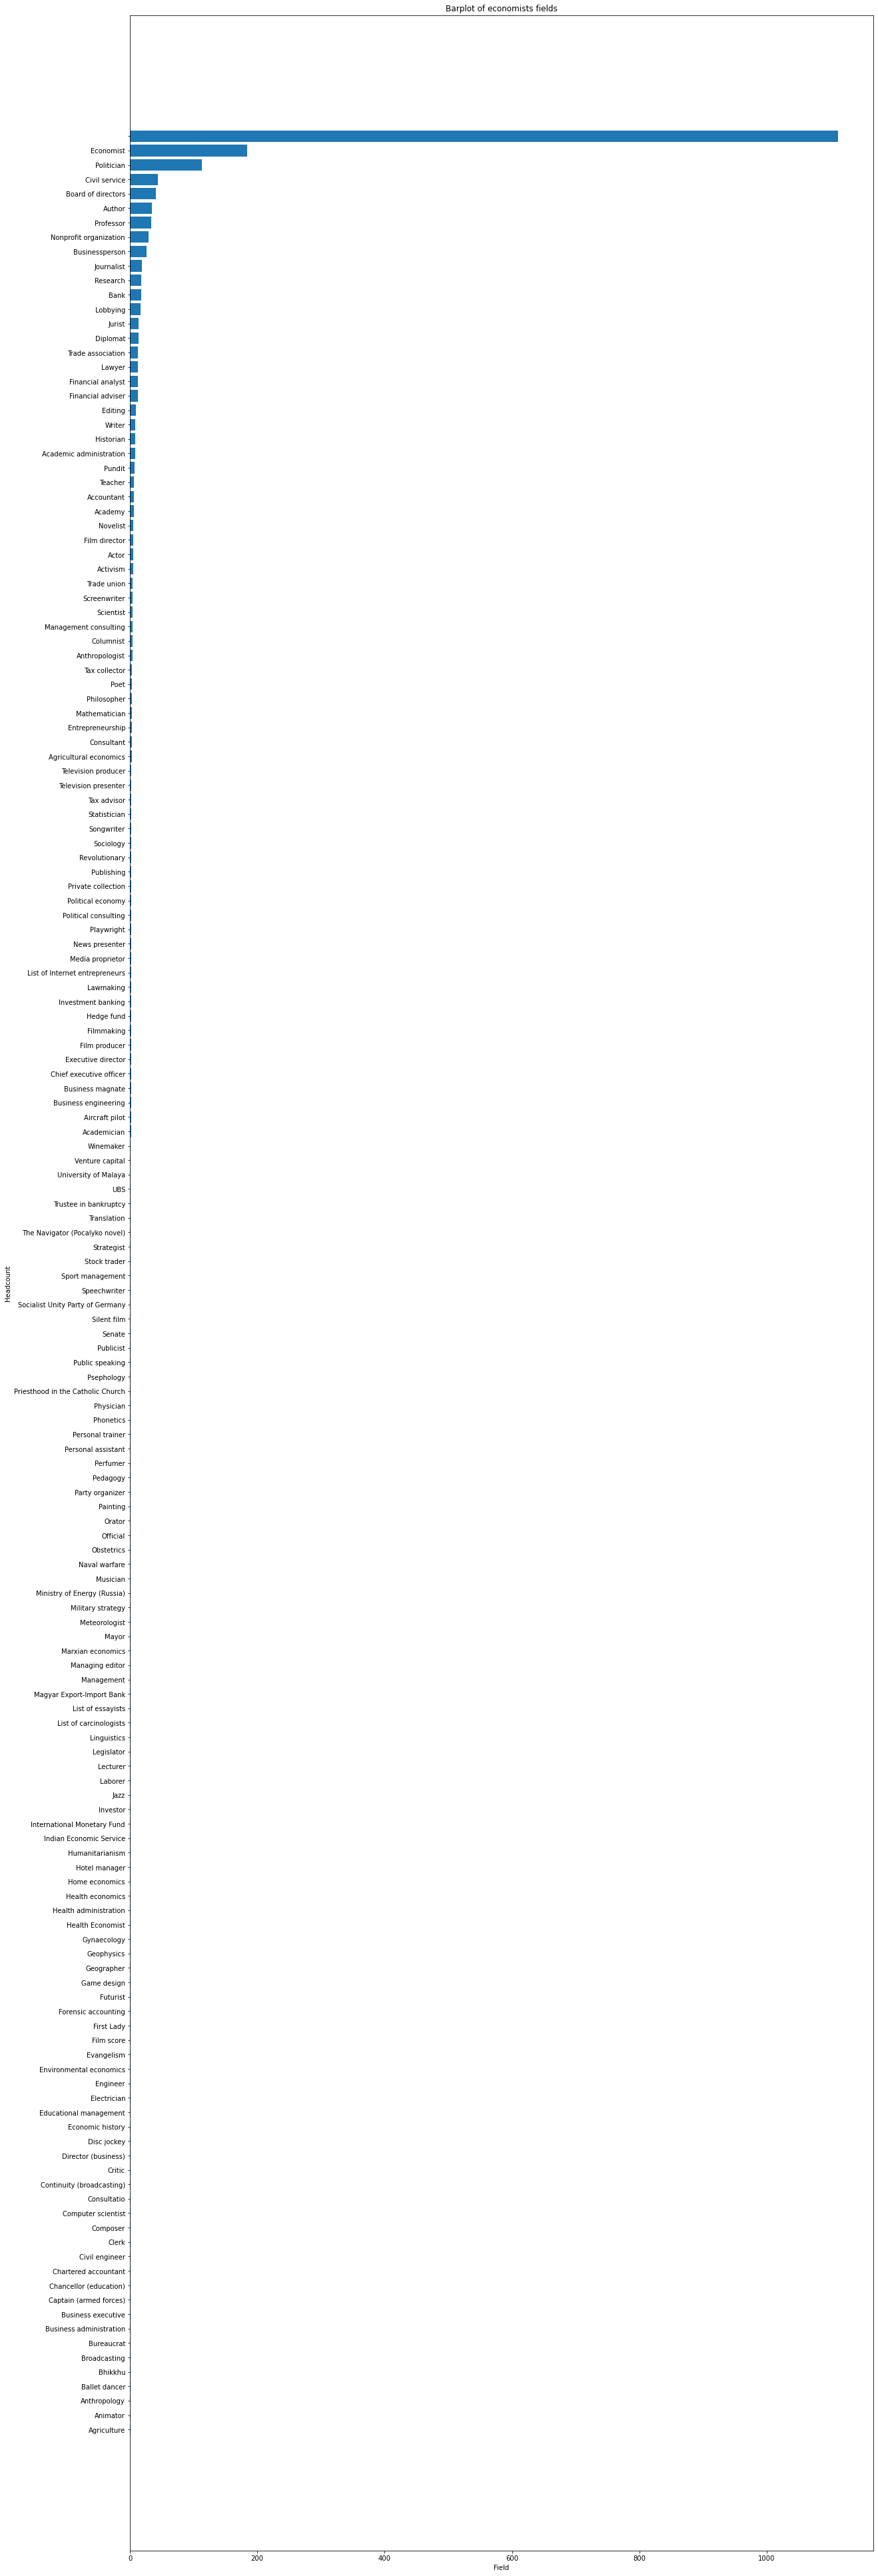

In [23]:
# Barplot of economists fields
eff = [l[1] for l in groupedOccupationList]
objects = [l[0] for l in groupedOccupationList]

p1 = plt.barh(eff, objects)

plt.ylabel('Headcount')
plt.xlabel('Field')
plt.title('Barplot of economists fields')
plt.gcf().set_size_inches(20, 70)
plt.yticks(rotation="horizontal")
p1 = plt.figure(1, [20, 3])

# Change of fontsize and angle of xticklabels
plt.gca().invert_yaxis()
plt.show()

In [28]:
bGOL=groupedOccupationList[:30]

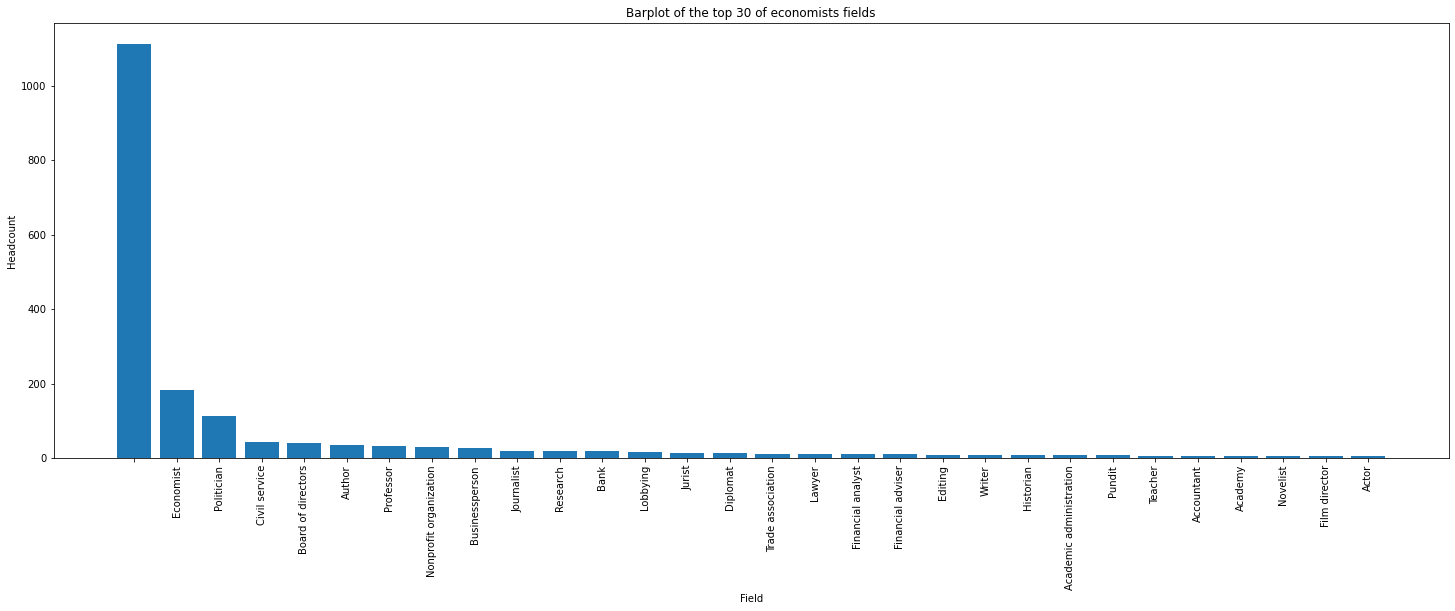

In [29]:
# Barplot of the top 30 of economists fields
eff1 = [l[1] for l in bGOL]
objects1 = [l[0] for l in bGOL]

p1 = plt.bar(eff1, objects1)

plt.ylabel('Headcount')
plt.xlabel('Field')
plt.title('Barplot of the top 30 of economists occupations')
plt.gcf().set_size_inches(25, 8)
plt.xticks(rotation="vertical")

p1 = plt.figure(1, [20, 8])

plt.show()

In [32]:
bGOL=groupedOccupationList[1:30]

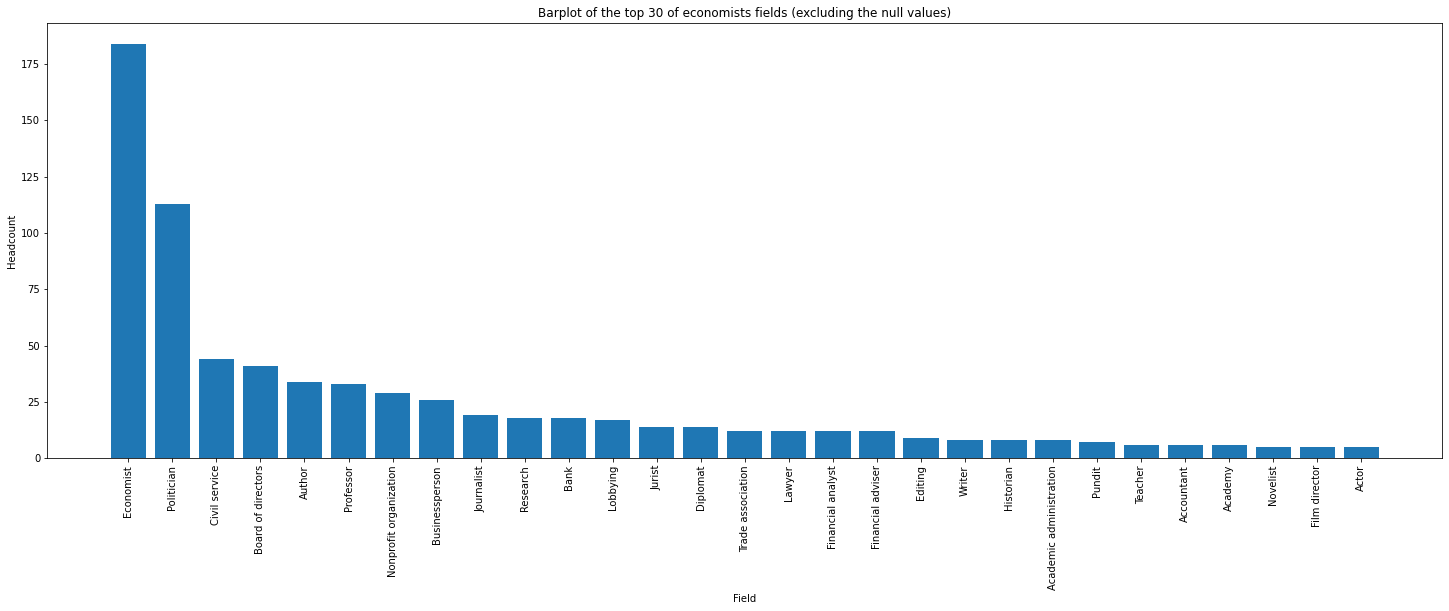

In [33]:
# Barplot of the top 30 of economists fields
eff1 = [l[1] for l in bGOL]
objects1 = [l[0] for l in bGOL]

p1 = plt.bar(eff1, objects1)

plt.ylabel('Headcount')
plt.xlabel('Field')
plt.title('Barplot of the top 30 of economists occupations (excluding the null values)')
plt.gcf().set_size_inches(25, 8)
plt.xticks(rotation="vertical")

p1 = plt.figure(1, [20, 8])

plt.show()